Отчёт по домашнему заданию «Методы исследования дискретных динамических систем» \
по курсу «Введение в нелинейную динамику» \
Антонов Егор Алексеевич, БПМ-214 \
16 Января 2024 г.

**Задание 1.** Требуется построить график отображения для нескольких значений параметра, построить бифуркационную диаграмму и найти зависимость ляпуновского показателя для указанного интервала значений параметра. Предполагается, что
$ 0 < x0 < 1 $.

$$ x_{n + 1} = f(x_n) $$
$$ f(x) = b \sin(\pi x ), \, b \in [0; \; \pi] \implies x_{n + 1} = b \sin(\pi x_n ), \, b \in [0; \; \pi], \, x_0 \in (0; 1) $$

Неподвижные точки отображения:
$$ x_f = f(x_f) \implies x_f = b \sin(\pi x_f ) $$

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def f(x, b):
    return b * np.sin(np.pi * x)

def dfdx(x, b):
    return b * np.pi * np.cos(np.pi * x)

Графики отображения для разных значений параметра $ b $:

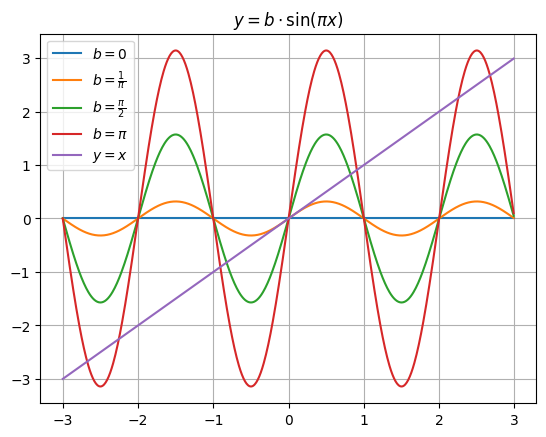

In [40]:
X = np.arange(-3, 3, 0.01)
plt.plot(X, f(X, b=0), label='$ b = 0 $')
plt.plot(X, f(X, b=1 / np.pi), label='$ b = \\frac{1}{\pi} $')
plt.plot(X, f(X, b=np.pi / 2), label='$ b = \\frac{\pi}{2} $')
plt.plot(X, f(X, b=np.pi), label='$ b = \pi $')
plt.plot(X, X, label='$ y = x $')
plt.title('$ y = b \cdot \sin(\pi x) $')
plt.legend()
plt.grid()
plt.show()

In [15]:
def fixed_points(x_0, b, n = 1000, eps = 1e-3):
    x_k = x_0
    for k in range(n):
        x_k = f(x_k, b)
    
    res = []
    for k in range(20):
        res.append(x_k)
        x_k = f(x_k, b)
    
    return res

Бифуркационная диаграмма:

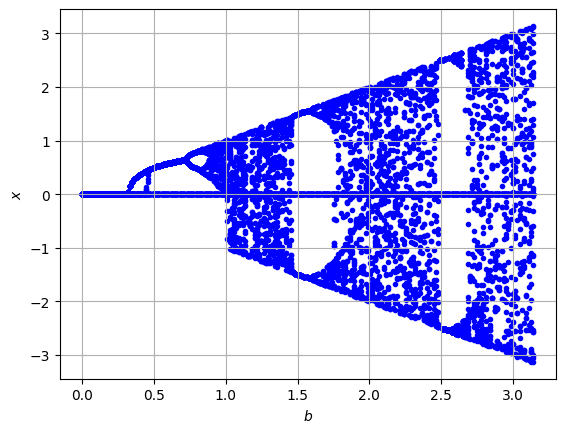

In [24]:
B = np.linspace(0, np.pi, 200)
for b in B:
    X_0 = np.linspace(0, 1, 4)
    for x_0 in X_0:
        X_F = fixed_points(x_0, b, n = 100)
        for x_f in X_F:
            plt.scatter(b, x_f, marker='.', color='blue')
plt.xlabel('$ b $')
plt.ylabel('$ x $')
plt.grid()
plt.show()

График значений экспоненты Ляпунова для разных значений параметра $b$:

In [41]:
def LyapunovExponent(x_0, b, n = 1000):
    sum = 0.0
    x_k = x_0
    for k in range(n):
        sum += np.log(np.abs(dfdx(x_k, b)))
        x_k = f(x_k, b)

    return sum / n

C:\Users\egora\AppData\Local\Temp\ipykernel_10596\1368710459.py:5: RuntimeWarning: divide by zero encountered in log
  sum += np.log(np.abs(dfdx(x_k, b)))


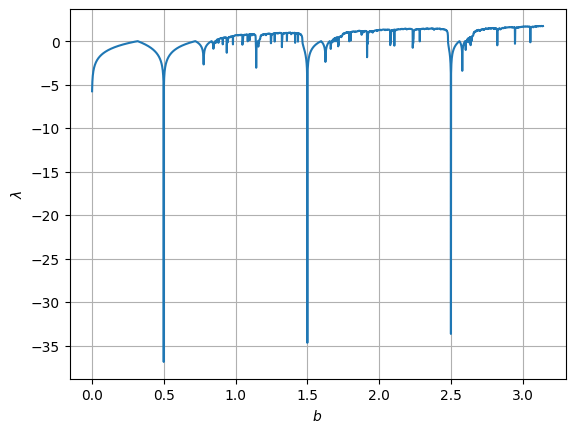

In [42]:
x_0 = 0.5
B = np.arange(0, np.pi, 0.001)
plt.plot(B, LyapunovExponent(x_0, B, n = 100000))
plt.grid()
plt.xlabel('$ b $')
plt.ylabel('$ \lambda $')
plt.show()